# Classification movie reviews: a binary classification example

### THE IMDB DATASET

#### Loading IMDB dataset

In [1]:
import tensorflow as tf
import tensorflow.keras as keras

In [2]:
imdb= keras.datasets.imdb
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [5]:
max([max(sequence) for sequence in train_data])

9999

#### word_index is a dictionary mapping

In [6]:
word_index=imdb.get_word_index()

#### words to an integer index

In [7]:
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])

#### Decodes the reviews


In [8]:
decoded_review= ''.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

### Preparing the data

#### Encoding the integer sequence into a binary matrix

In [9]:
import numpy as np
def vector_sequences(sequences,dimension=10000):
    results=np.zeros((len(sequences),dimension))
    #Creates an all- zeros matrix of shape(len(sequences),dimension)
    for i, sequence in enumerate(sequences):
        results[i,sequence]= 1
        #Sets specific indices of results[i] to 1s
    return results

In [10]:
x_train = vector_sequences(train_data)
#Vectorized training data
x_test = vector_sequences(test_data)
#Vectorized testing data

In [11]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [12]:
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

## Model 

In [13]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers


model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


### Configuring the optimizer , loss , metrics

In [14]:
model.compile(loss = 'binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [15]:
x_val=x_train[:10000]
partial_x_train= x_train[10000:]
y_val=y_train[:10000]
partial_y_train = y_train[10000:]

## Training the Model

In [16]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 187us/sample - loss: 0.5492 - accuracy: 0.7617 - val_loss: 0.4141 - val_accuracy: 0.8714
Epoch 2/20
15000/15000 [==============================] - 2s 113us/sample - loss: 0.3258 - accuracy: 0.9026 - val_loss: 0.3231 - val_accuracy: 0.8793
Epoch 3/20
15000/15000 [==============================] - 2s 119us/sample - loss: 0.2346 - accuracy: 0.9275 - val_loss: 0.2975 - val_accuracy: 0.8827
Epoch 4/20
15000/15000 [==============================] - 2s 119us/sample - loss: 0.1830 - accuracy: 0.9419 - val_loss: 0.2784 - val_accuracy: 0.8865
Epoch 5/20
15000/15000 [==============================] - 2s 120us/sample - loss: 0.1450 - accuracy: 0.9561 - val_loss: 0.3168 - val_accuracy: 0.8738
Epoch 6/20
15000/15000 [==============================] - 2s 120us/sample - loss: 0.1218 - accuracy: 0.9626 - val_loss: 0.3113 - val_accuracy: 0.8771
Epoch 7/20
15000/15000 [==========================

In [17]:
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

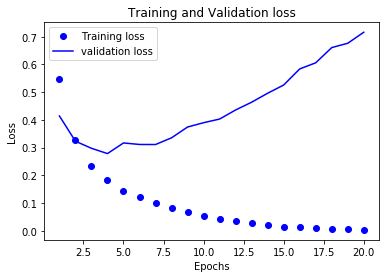

In [18]:
import matplotlib.pyplot as plt
history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs = range(1, len('acc') +18)
plt.plot(epochs,loss_values,'bo',label="Training loss")
plt.plot(epochs,val_loss_values,'b',label="validation loss")
plt.title("Training and Validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
model=models.Sequential()
model.add(layers.Dense(32,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5,batch_size=512)

Train on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 3s 127us/sample - loss: 0.4703 - accuracy: 0.7899
Epoch 2/5
25000/25000 [==============================] - 2s 90us/sample - loss: 0.2607 - accuracy: 0.9034
Epoch 3/5
25000/25000 [==============================] - 2s 89us/sample - loss: 0.2007 - accuracy: 0.9280
Epoch 4/5
25000/25000 [==============================] - 2s 89us/sample - loss: 0.1687 - accuracy: 0.9374
Epoch 5/5
25000/25000 [==============================] - 2s 89us/sample - loss: 0.1384 - accuracy: 0.9505


In [20]:
results = model.evaluate(x_test,y_test)

25000/25000 [==============================] - 4s 154us/sample - loss: 0.3703 - accuracy: 0.8652


In [21]:
results

[0.3702788720035553, 0.86516]

In [22]:
model.predict(x_test)

array([[0.1019486 ],
       [0.9999887 ],
       [0.8664858 ],
       ...,
       [0.09494323],
       [0.04960118],
       [0.6102549 ]], dtype=float32)